# Introduction to Copula

## What is a copula?

- __function__ that takes two marginal CDF and produces a joint CDF
- allows to separate the modelling of the marginal distributions and the modelling of the dependence

## Cumulative distribution functions

In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits import mplot3d

In [2]:
norm = stats.distributions.norm()

In [3]:
n = 10000
nvec = norm.rvs(size=n)

In [4]:
nvec[1:10]

array([ 0.75492903,  0.72048088, -0.67719382,  0.11732866,  0.08490975,
        0.41335178,  1.03022937, -0.05232019, -1.23689229])

In [5]:
nvec.sort()

In [6]:
res = np.column_stack((nvec, np.arange(nvec.shape[0])/n))

In [7]:
res[1:10, ]

array([[-3.49420406e+00,  1.00000000e-04],
       [-3.31773318e+00,  2.00000000e-04],
       [-3.29112939e+00,  3.00000000e-04],
       [-3.28437637e+00,  4.00000000e-04],
       [-3.19212193e+00,  5.00000000e-04],
       [-3.18257461e+00,  6.00000000e-04],
       [-3.11985737e+00,  7.00000000e-04],
       [-3.11537370e+00,  8.00000000e-04],
       [-3.08166704e+00,  9.00000000e-04]])

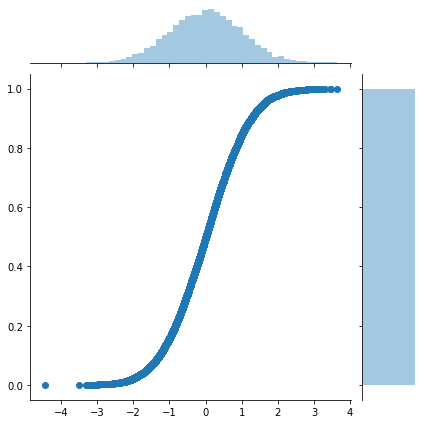

In [8]:
sb.jointplot(res[:,0], res[:,1], stat_func=None)

## Correlation visual for the density

In [9]:
def plot_mvnorm_pdf(cov, title):
    x, y = np.mgrid[-4:4:.1, -4:4:.1]
    grid = np.dstack((x, y))
    
    mvnorm = stats.multivariate_normal(mean=[0,0], cov=cov)
    mvnorm_pdf = mvnorm.pdf(grid)
    
    plt.rcParams["figure.figsize"] = (20,10)
    ig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, mvnorm_pdf, cmap='winter', edgecolor='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)
    ax.view_init(60, 60)
    plt.show()

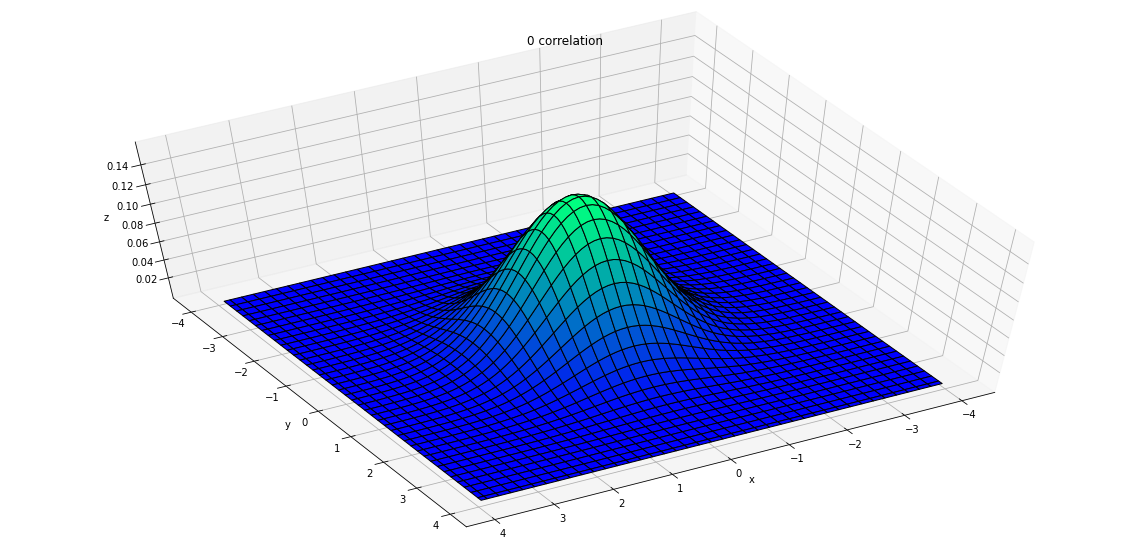

In [10]:
plot_mvnorm_pdf(cov=[[1, 0], [0, 1]], title="0 correlation")

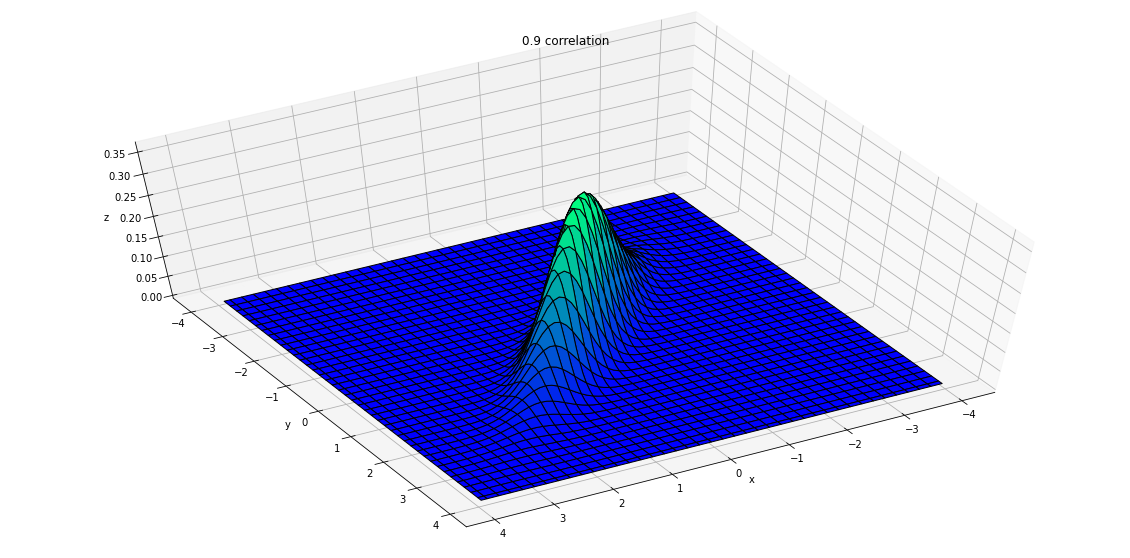

In [11]:
plot_mvnorm_pdf(cov=[[1, 0.9], [0.9, 1]], title="0.9 correlation")

### Correlation visual for the CDF

In [12]:
def plot_mvnorm_cdf(cov, title):
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    grid = np.dstack((x, y))
    
    mvnorm = stats.multivariate_normal(mean=[0,0], cov=cov)
    mvnorm_cdf = mvnorm.cdf(grid)
    
    plt.rcParams["figure.figsize"] = (20,10)
    ig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, mvnorm_cdf, cmap='winter', edgecolor='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)
    ax.view_init(60, 60)
    plt.show()

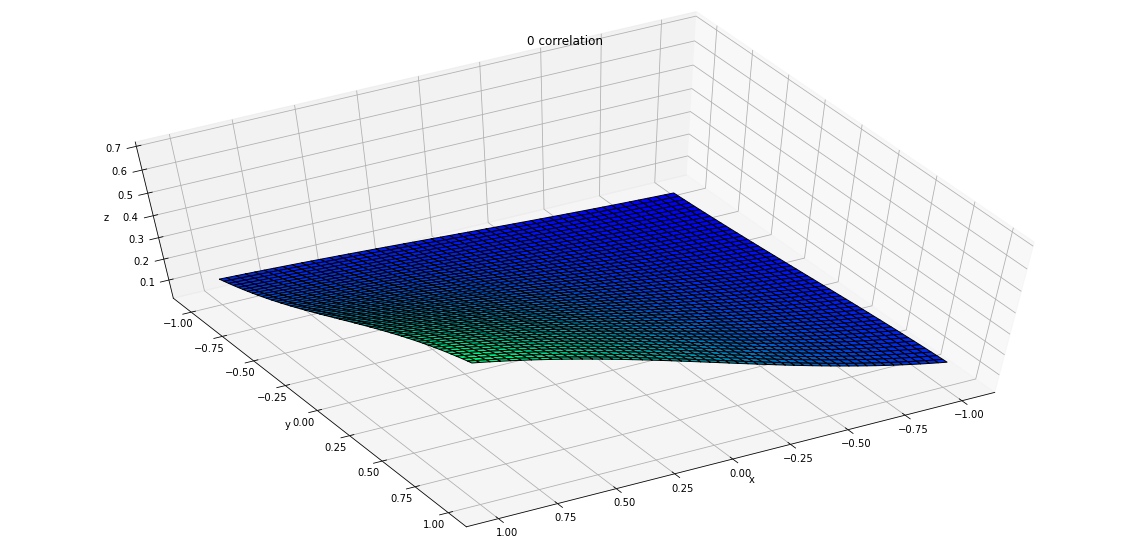

In [13]:
plot_mvnorm_cdf(cov=[[1, 0], [0, 1]], title="0 correlation")

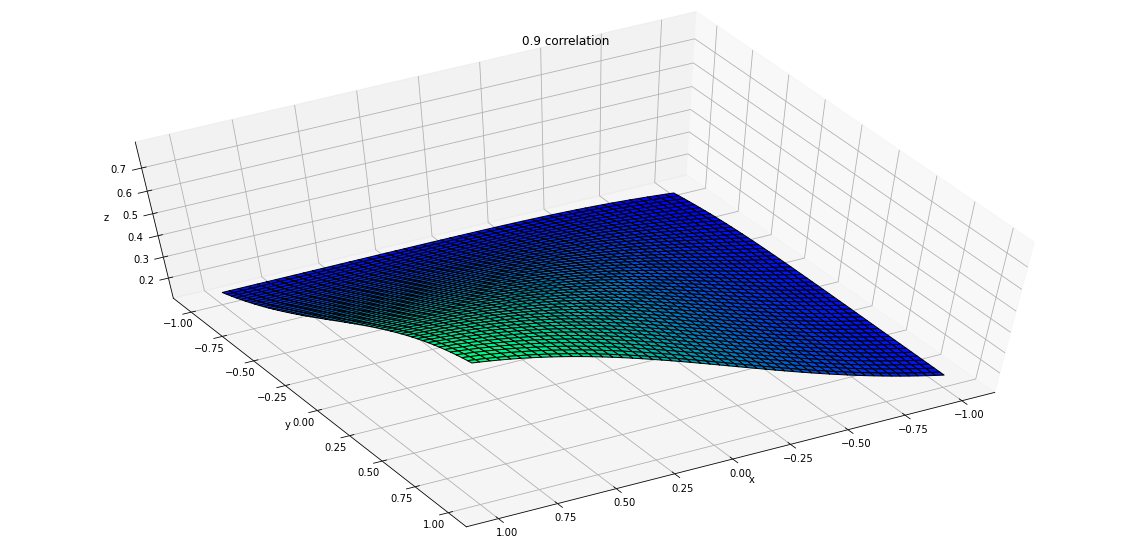

In [14]:
plot_mvnorm_cdf(cov=[[1, 0.9], [0.9, 1]], title="0.9 correlation")

## Sklar's theorem

From ["Analysing Dependent Data with Vine Copula", Czado](https://www.springer.com/gp/book/9783030137847):

_Let __X__ be a d-dimensional random vector with joint distribution function F and marginal distribution functions F<sub>i</sub>, i=1,...,d then the joint distribution function can be expressed as_

${\displaystyle F(x_{1},\dots ,x_{d})=C(F_{1}(x_{1}), \dots, F_{d}(x_{d})) }$

_for some d-dimensional copula C. For absolutely continuous distributions, the copula C is unique._

_The inverse also holds: the copula corresponding to a multivariate distribution function F with marginal distribution functions F<sub>i</sub>, i=1,...,d can be expressed as_

${\displaystyle C(u_{1},\dots ,u_{d})=F(F_{1}^{-1}(u_{1}), \dots, F_{d}^{-1}(u_{d})) }$



From [Wikipedia](https://en.wikipedia.org/wiki/Copula_(probability_theory)):

Consider a random vector ${\displaystyle (X_{1},X_{2},\dots ,X_{d})}$. Suppose its marginals are continuous, i.e. the marginal CDFs ${\displaystyle F_{i}(x)=\Pr[X_{i}\leq x]}$ are continuous functions. By applying the probability integral transform to each component, the random vector

${\displaystyle (U_{1},U_{2},\dots ,U_{d})=\left(F_{1}(X_{1}),F_{2}(X_{2}),\dots ,F_{d}(X_{d})\right)}$

has marginals that are uniformly distributed on the interval [0, 1].

The copula of ${\displaystyle (X_{1},X_{2},\dots ,X_{d})}$ is defined as the joint cumulative distribution function of ${\displaystyle (U_{1},U_{2},\dots ,U_{d})}$:

${\displaystyle C(u_{1},u_{2},\dots ,u_{d})=\Pr[U_{1}\leq u_{1},U_{2}\leq u_{2},\dots ,U_{d}\leq u_{d}].}$
The copula C contains all information on the dependence structure between the components of ${\displaystyle (X_{1},X_{2},\dots ,X_{d})}$ whereas the marginal cumulative distribution functions ${\displaystyle F_{i}}$ contain all information on the marginal distributions of ${\displaystyle X_{i}}$.



## Copula construction

### Bivariate Gaussian simulation

In [15]:
# instantiate the distribution:
mvnorm = stats.multivariate_normal(mean=[0,0], cov=[[1, 0.9], [0.9, 1]])

In [16]:
# generate random values from instantiated distribution:
sample_size = 100000
mvnorm_sample = mvnorm.rvs(sample_size)

In [17]:
mvnorm_sample[0:10]

array([[-0.82386208, -0.30705654],
       [-0.95607796, -1.32550399],
       [-0.34857905, -0.21576658],
       [ 0.75991381,  1.17397444],
       [ 0.84374426,  1.19114691],
       [ 0.11624984,  0.06547843],
       [ 0.2884823 ,  0.27450285],
       [-0.93434079, -1.09140892],
       [ 0.87177614,  0.75907023],
       [ 0.65726641,  0.57509226]])

### CDF

In [18]:
from scipy import interpolate

In [19]:
def build_inverse_cdf(s):
    s = s.copy()
    s.sort()
    return interpolate.interp1d(x=s, y=np.arange(s.shape[0])/s.shape[0], bounds_error=False, fill_value=(0, 1))

In [20]:
# build the two marginal CDF:
F1 = build_inverse_cdf(mvnorm_sample[:, 0])
F2 = build_inverse_cdf(mvnorm_sample[:, 1])

In [21]:
# define the grid over which to compute points:
nx = 40
x = np.linspace(0, 1, nx)

In [22]:
# apply the inverse CDF to the marginals of the sample:
F1_p = F1(mvnorm_sample[:, 0])
F2_p = F1(mvnorm_sample[:, 1])

In [23]:
F1_p

array([0.2035 , 0.16783, 0.36142, ..., 0.64399, 0.96188, 0.62951])

### Empirical copula

In [24]:
# calculate the empirical copula:
C_hat = np.zeros([nx, nx])
for i in range(nx):
    for j in range(nx):
        ui = x[i]
        uj = x[j]
        C_hat[i, j] = np.sum((F1_p <= ui) & (F2_p <= uj)) / sample_size

In [25]:
# get the density of the copula as it's easier to visualize:
dx, dy = np.gradient(C_hat, 1/nx)
dxdx, dxdy = np.gradient(dx, 1/nx)

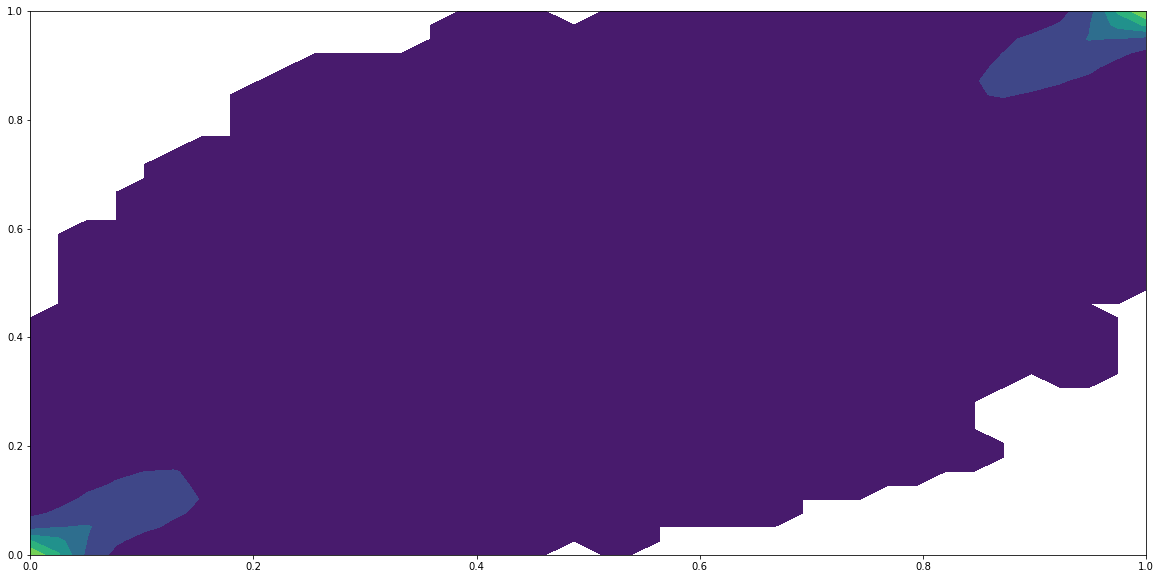

In [26]:
h = plt.contourf(x, x, dxdy)
plt.show()

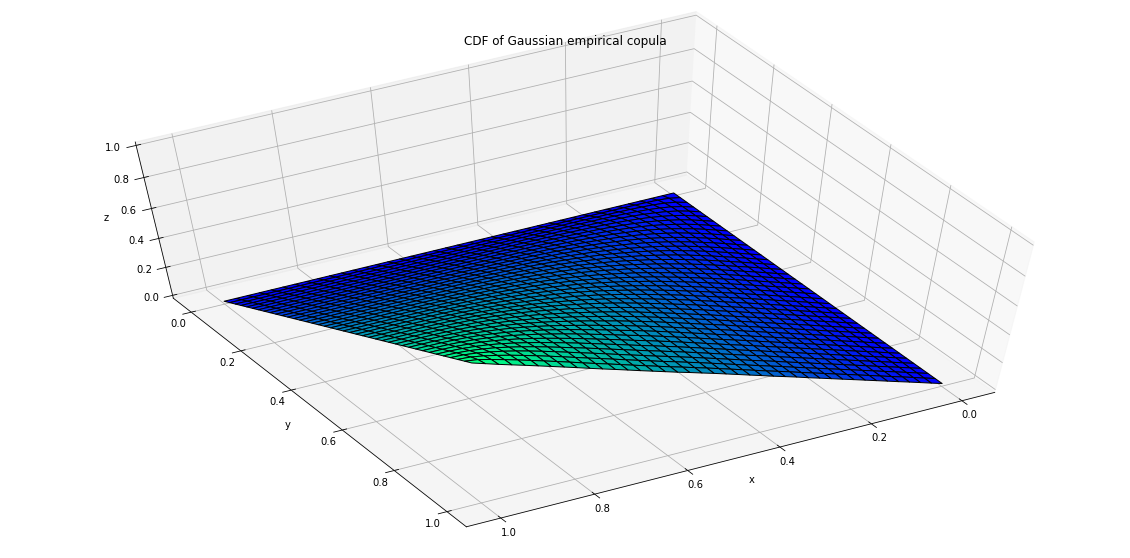

In [27]:
plt.rcParams["figure.figsize"] = (20,10)
ig = plt.figure()
ax = plt.axes(projection='3d')
xx, yy = np.meshgrid(x, x)
ax.plot_surface(xx, yy, C_hat, cmap='winter', edgecolor='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 60)
ax.set_title('CDF of Gaussian empirical copula')
plt.show()

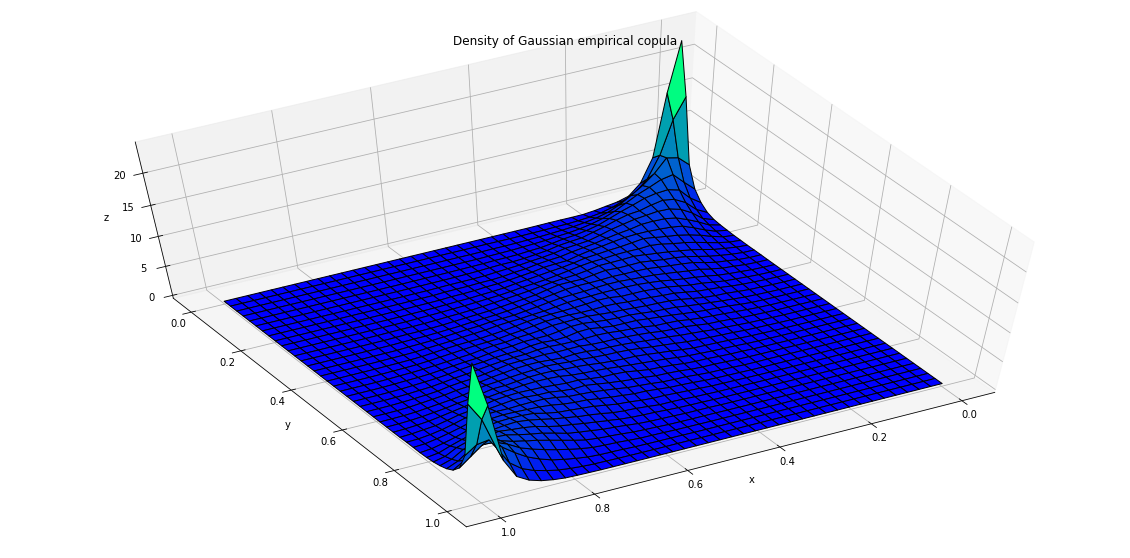

In [28]:
plt.rcParams["figure.figsize"] = (20,10)
ig = plt.figure()
ax = plt.axes(projection='3d')
xx, yy = np.meshgrid(x, x)
ax.plot_surface(xx, yy, dxdy, cmap='winter', edgecolor='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 60)
ax.set_title('Density of Gaussian empirical copula')
plt.show()

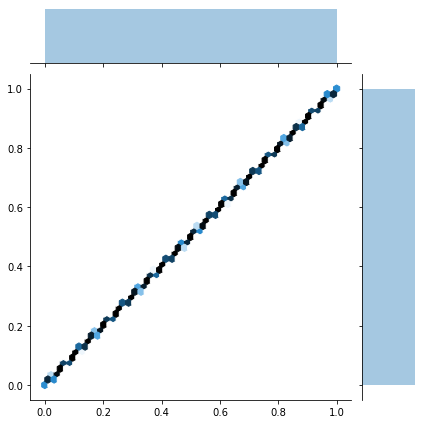

In [29]:
h = sb.jointplot(F1_p, F1_p, kind='hex', stat_func=None)

## From the `PyCopula` package

<Figure size 1440x720 with 0 Axes>

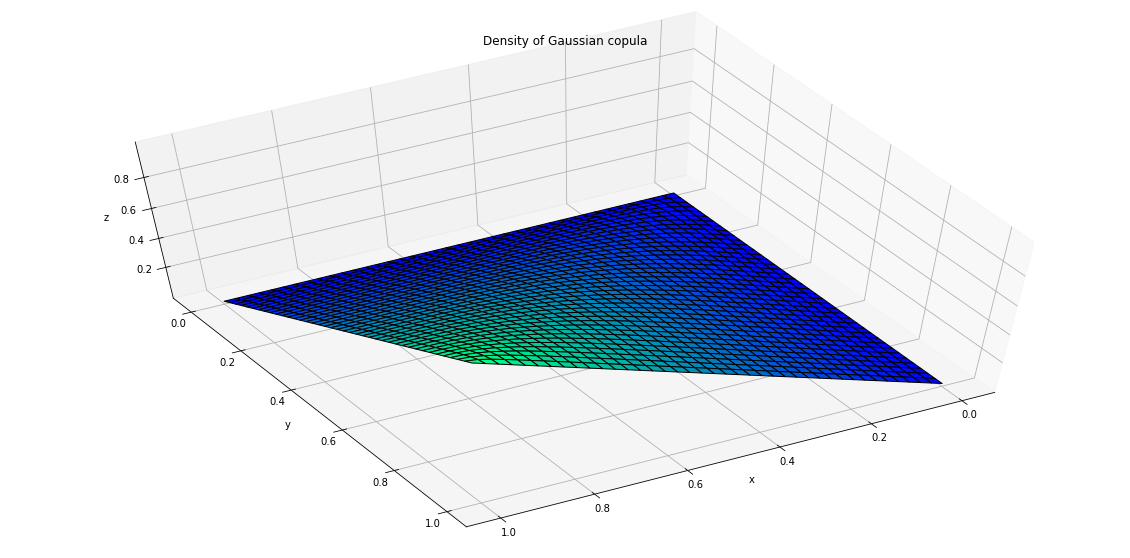

In [30]:
from matplotlib import cm
from pycopula.copula import *
from mpl_toolkits.mplot3d import Axes3D
from pycopula.visualization import pdf_2d
from pycopula.visualization import cdf_2d


gc = GaussianCopula(dim=2, R=[[1, 0.9], [0.9, 1]])

fig = plt.figure()
index = 1

# For each copula
u, v, c = cdf_2d(gc, step = 40)
x, y = np.meshgrid(u, v)

plt.rcParams["figure.figsize"] = (20,10)
ig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, c, cmap='winter', edgecolor='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 60)
ax.set_title('Density of Gaussian copula')
plt.show()

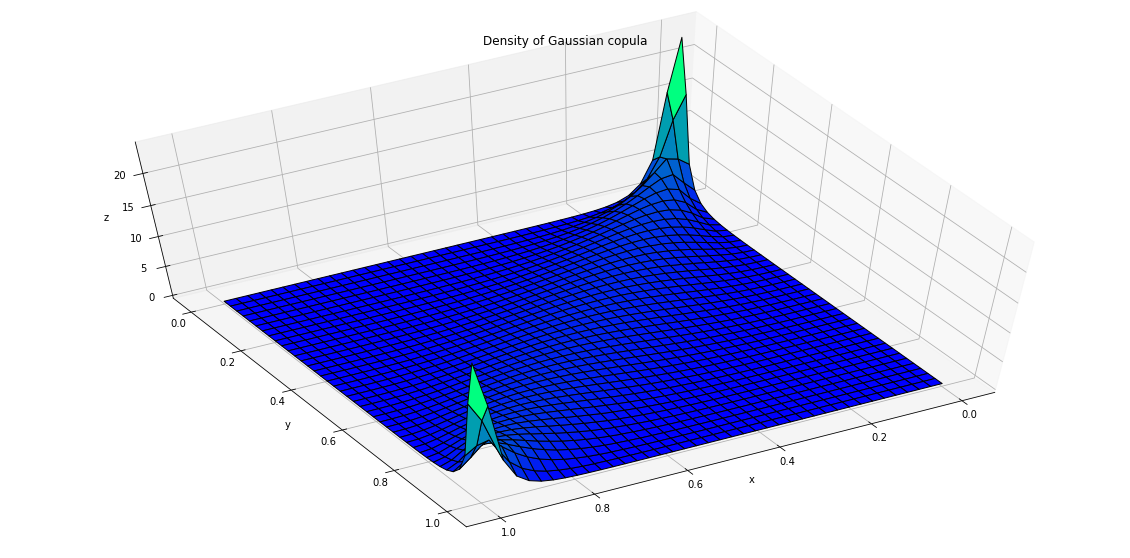

In [31]:
# use `gradient`, as `pdf_c2` is not well implemented in package:
dx, dy = np.gradient(c, 1/40)
dxdx, dxdy = np.gradient(dx, 1/40)
dxdy = dxdy
plt.rcParams["figure.figsize"] = (20,10)
ig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, dxdy, cmap='winter', edgecolor='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 60)
ax.set_title('Density of Gaussian copula')
plt.show()

## Generation of distributions

### Gaussian copula with Gaussian input

In [32]:
def C_gaussian(xx, yy):
    z = np.zeros((xx.size, yy.size))
    for i in range(xx.size):
        for j in range(yy.size):
            # pycopula can't handle 0 or 1:
            xxi = 1e-9 if xx[i]==0 else xx[i]
            xxi = 1 - 1e-9 if xx[i]==1 else xxi
            yyj = 1e-9 if yy[j]==0 else yy[j]
            yyj = 1 - 1e-9 if yy[j]==1 else yyj
            z[i, j] = gc.cdf([xxi, yyj])
    x, y = np.meshgrid(g1, g2)
    return (x, y, z)

def join_and_plot(xx, yy, title):
    x, y, z = C_gaussian(xx, yy)

    dx, dy = np.gradient(z, 1/nx)
    dxdx, dxdy = np.gradient(dx, 1/nx)
    dxdy = dxdy

    plt.rcParams["figure.figsize"] = (20,10)
    ig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, dxdy, cmap='winter', edgecolor='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(60, 60)
    ax.set_title(title)
    plt.show()

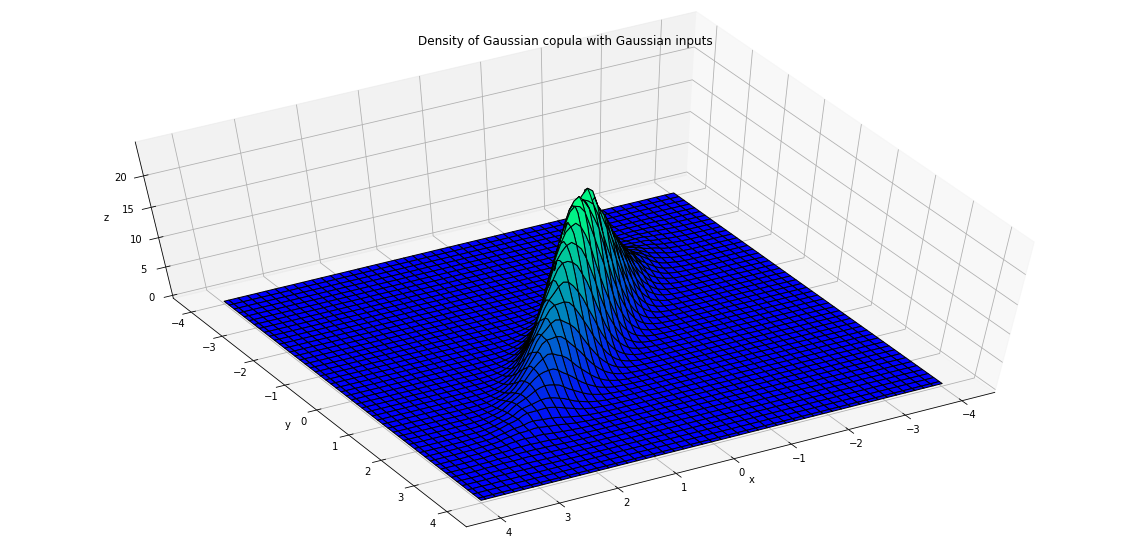

In [33]:
nx = 100
g1 = g2 = np.linspace(-4, 4, nx)
xx = F1(g1)
yy = F1(g2)

join_and_plot(xx, yy, 'Density of Gaussian copula with Gaussian inputs')

### Gaussian copula with Beta input

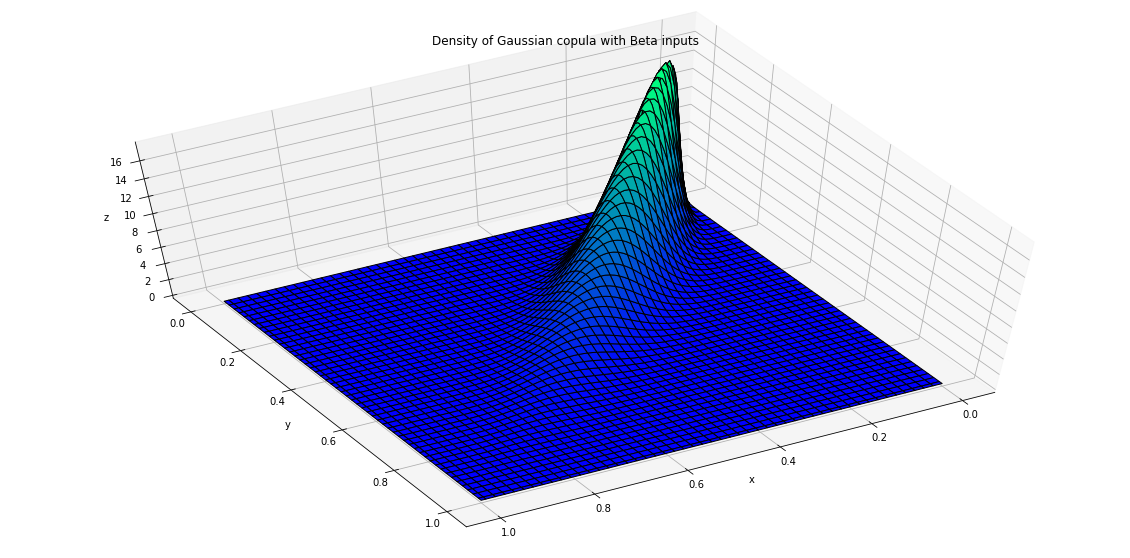

In [34]:
from scipy.stats import beta
a, b = 2, 5
g1 = g2 = np.linspace(beta.cdf(0.01, a, b), beta.cdf(0.99, a, b), nx)
xx = beta.cdf(g1, a, b)
yy = beta.cdf(g2, a, b)
join_and_plot(xx, yy, 'Density of Gaussian copula with Beta inputs')

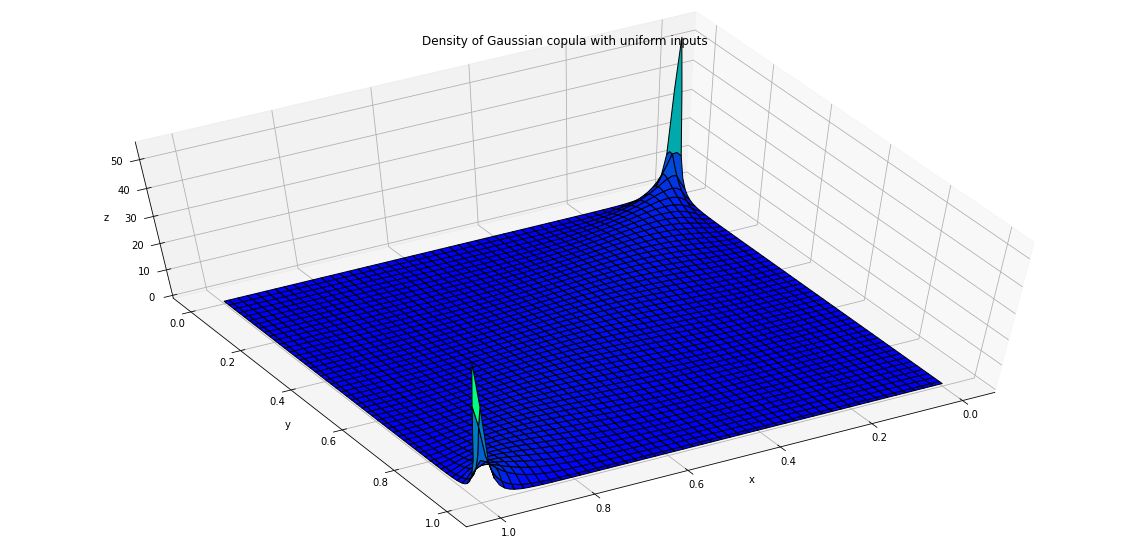

In [35]:
xx = yy = np.linspace(0, 1, nx)
join_and_plot(xx, yy, 'Density of Gaussian copula with uniform inputs')